## Assignment-07-DBSCAN Clustering (Crimes)

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
import warnings
warnings.filterwarnings('ignore')
# Supressing Warnings


In [ ]:
# Import Data
crime=pd.read_csv("/content/crime_data.csv")
crime 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(crime)
crime_norm


array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
df_norm=norm_func(crime.iloc[:,1:])

In [ ]:
df_norm

,Assault,UrbanPop,Rape
0,0.654110,0.440678,0.359173
1,0.746575,0.271186,0.961240
2,0.852740,0.813559,0.612403
3,0.496575,0.305085,0.315245
4,0.791096,1.000000,0.860465
5,0.544521,0.779661,0.811370
6,0.222603,0.762712,0.098191
7,0.660959,0.677966,0.219638
8,0.993151,0.813559,0.635659
9,0.568493,0.474576,0.478036


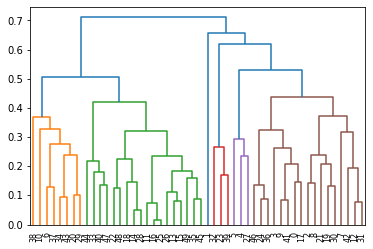

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [ ]:
# create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [ ]:
y_hc=hc.fit_predict(df_norm)

In [ ]:
y_hc

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1,
       2, 1, 1, 2, 1, 1])

In [ ]:
crime['h_clusterid']=hc.labels_

In [ ]:
crime

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,1


In [ ]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

# Kmeans

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
df_norm=norm_func(crime.iloc[:,1:])

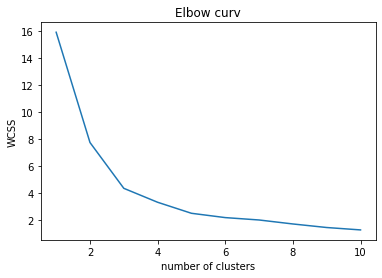

In [ ]:
# Elbow curv
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# selecting 4 clusters from above scree plot
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([0, 3, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1,
       0, 3, 0, 2, 0, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 0, 1, 0,
       2, 0, 0, 2, 0, 0], dtype=int32)

In [ ]:
x=pd.Series(model.labels_)
crime['Clust']=x

In [ ]:
crime

,Murder,Assault,UrbanPop,Rape,h_clusterid,Clust
0,13.2,236,58,21.2,1,0
1,10.0,263,48,44.5,0,3
2,8.1,294,80,31.0,0,1
3,8.8,190,50,19.5,1,0
4,9.0,276,91,40.6,0,1
5,7.9,204,78,38.7,0,1
6,3.3,110,77,11.1,1,0
7,5.9,238,72,15.8,1,0
8,15.4,335,80,31.9,0,1
9,17.4,211,60,25.8,1,0


In [ ]:
crime.iloc[:,1:5].groupby(crime.Clust).mean()

,Assault,UrbanPop,Rape,h_clusterid
Clust,,,,
0,148.040000,69.560000,19.460000,1.0
1,264.090909,79.090909,32.618182,0.0
2,79.400000,48.300000,11.610000,2.0
3,284.500000,46.250000,25.050000,0.0


# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Murder       50 non-null     float64
 1   Assault      50 non-null     int64  
 2   UrbanPop     50 non-null     int64  
 3   Rape         50 non-null     float64
 4   h_clusterid  50 non-null     int64  
 5   Clust        50 non-null     int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 2.3 KB


In [ ]:
df=crime.iloc[:,1:5]

In [ ]:
df.values

array([[236. ,  58. ,  21.2,   1. ],
       [263. ,  48. ,  44.5,   0. ],
       [294. ,  80. ,  31. ,   0. ],
       [190. ,  50. ,  19.5,   1. ],
       [276. ,  91. ,  40.6,   0. ],
       [204. ,  78. ,  38.7,   0. ],
       [110. ,  77. ,  11.1,   1. ],
       [238. ,  72. ,  15.8,   1. ],
       [335. ,  80. ,  31.9,   0. ],
       [211. ,  60. ,  25.8,   1. ],
       [ 46. ,  83. ,  20.2,   1. ],
       [120. ,  54. ,  14.2,   2. ],
       [249. ,  83. ,  24. ,   0. ],
       [113. ,  65. ,  21. ,   1. ],
       [ 56. ,  57. ,  11.3,   2. ],
       [115. ,  66. ,  18. ,   1. ],
       [109. ,  52. ,  16.3,   2. ],
       [249. ,  66. ,  22.2,   1. ],
       [ 83. ,  51. ,   7.8,   2. ],
       [300. ,  67. ,  27.8,   0. ],
       [149. ,  85. ,  16.3,   1. ],
       [255. ,  74. ,  35.1,   0. ],
       [ 72. ,  66. ,  14.9,   1. ],
       [259. ,  44. ,  17.1,   0. ],
       [178. ,  70. ,  28.2,   1. ],
       [109. ,  53. ,  16.4,   2. ],
       [102. ,  62. ,  16.5,   1. ],
 

In [ ]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)

In [ ]:
x

array([[ 0.79078716, -0.52619514, -0.00345116,  0.14285714],
       [ 1.11805959, -1.22406668,  2.50942392, -1.28571429],
       [ 1.49381682,  1.00912225,  1.05346626, -1.28571429],
       [ 0.23321191, -1.08449238, -0.18679398,  0.14285714],
       [ 1.2756352 ,  1.77678094,  2.08881393, -1.28571429],
       [ 0.40290872,  0.86954794,  1.88390137, -1.28571429],
       [-0.73648418,  0.79976079, -1.09272319,  0.14285714],
       [ 0.81502956,  0.45082502, -0.58583422,  0.14285714],
       [ 1.99078607,  1.00912225,  1.1505301 , -1.28571429],
       [ 0.48775713, -0.38662083,  0.49265293,  0.14285714],
       [-1.51224105,  1.21848371, -0.11129987,  0.14285714],
       [-0.61527217, -0.80534376, -0.75839217,  1.57142857],
       [ 0.94836277,  1.21848371,  0.29852525, -1.28571429],
       [-0.70012057, -0.03768506, -0.0250209 ,  0.14285714],
       [-1.39102904, -0.5959823 , -1.07115345,  1.57142857],
       [-0.67587817,  0.03210209, -0.34856705,  0.14285714],
       [-0.74860538, -0.

In [ ]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)
DBSCAN(eps=2)

DBSCAN(eps=2)

In [ ]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
pd.concat([crime,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,h_clusterid,Clust,cluster
0,13.2,236,58,21.2,1,0,0
1,10.0,263,48,44.5,0,3,-1
2,8.1,294,80,31.0,0,1,0
3,8.8,190,50,19.5,1,0,0
4,9.0,276,91,40.6,0,1,0
5,7.9,204,78,38.7,0,1,0
6,3.3,110,77,11.1,1,0,0
7,5.9,238,72,15.8,1,0,0
8,15.4,335,80,31.9,0,1,0
9,17.4,211,60,25.8,1,0,0


In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
# Adding clusters to dataset
crime['clusters']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,h_clusterid,Clust,clusters
0,13.2,236,58,21.2,1,0,0
1,10.0,263,48,44.5,0,3,-1
2,8.1,294,80,31.0,0,1,0
3,8.8,190,50,19.5,1,0,0
4,9.0,276,91,40.6,0,1,0
5,7.9,204,78,38.7,0,1,0
6,3.3,110,77,11.1,1,0,0
7,5.9,238,72,15.8,1,0,0
8,15.4,335,80,31.9,0,1,0
9,17.4,211,60,25.8,1,0,0


In [ ]:
crime.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape,h_clusterid,Clust
,,mean,mean,mean,mean,mean,mean
0,-1,10.000000,263.000000,48.000000,44.500000,0.000000,3.000000
1,0,7.742857,168.877551,65.897959,20.757143,0.918367,0.816327


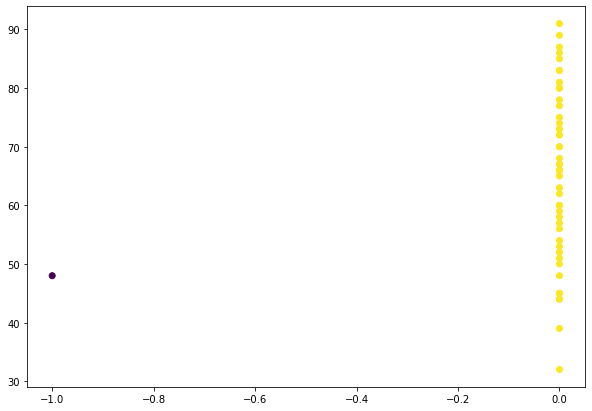

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_) 

# 2 - Data collection and description

In [ ]:
import numpy as np
import pandas as pd 


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [ ]:
data = pd.read_excel("/content/EastWestAirlines (1).xlsx", sheet_name='data')

In [ ]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
data.set_index('ID',inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [ ]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [ ]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

print('unique_cc1',data.cc1_miles.unique())
print('unique_cc2',data.cc2_miles.unique())
print('unique_cc3',data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


# Missing Values

In [ ]:
# As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns

null_count_col = data.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (data.isnull().sum() * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    11
dtype: int64 

Null Percentage for Columns:

 0.0    11
dtype: int64


# Duplicated Values

In [ ]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
data.duplicated().sum()


1

In [ ]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [ ]:
	
# drop duplicate rows
 
data.drop_duplicates()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


# Agglomerative Clustering

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## # We will check clustering for two different scaling functions
[ ]


In [ ]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [ ]:
# Normalizing dataset
scaler1_df = scaler1.fit_transform(data)
print(scaler1_df)


[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


In [ ]:
# Normalizing
scaler2_df = scaler2.fit_transform(data)
print(scaler2_df)


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


# Create Dendrograms

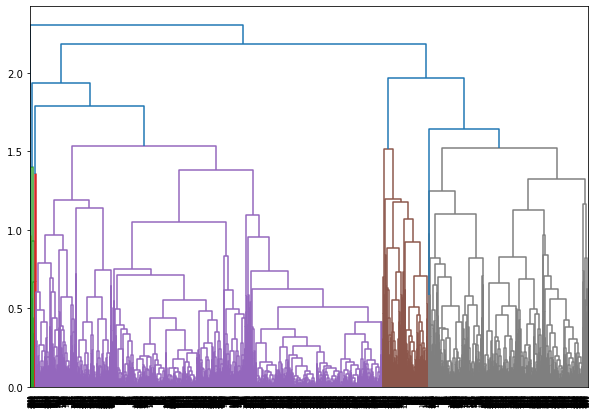

In [ ]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler1_df,'complete'))

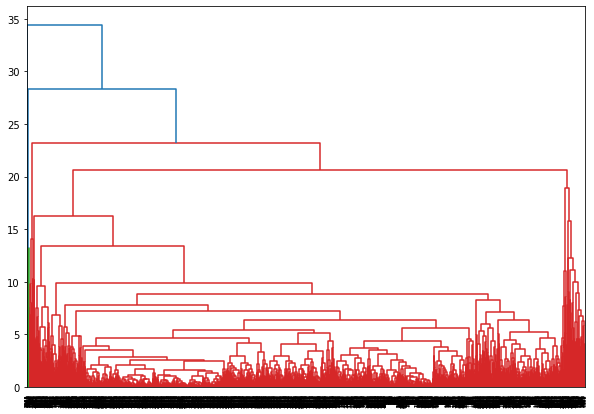

In [ ]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler2_df,'complete'))

# Creating Clusters

In [ ]:
H_clusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=5)

In [ ]:
y=pd.DataFrame(H_clusters.fit_predict(scaler1_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0    946 
2    808 
4    699 
3    535 
Name: clustersid, dtype: int64

In [ ]:
y=pd.DataFrame(H_clusters.fit_predict(scaler2_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    2446
0    1362
2    130 
3    43  
4    18  
Name: clustersid, dtype: int64

In [ ]:
data['clustersid_s1']=H_clusters.labels_

In [ ]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [ ]:
data['clustersid_s2']=H_clusters.labels_

In [ ]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2
ID,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0


In [ ]:
data.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,116134.226872,367.779736,3.500000,1.000000,1.000000,36501.331865,17.958884,376.402349,1.147577,4699.638767,0.665198,0.0
1,1,46329.336877,9.028618,1.244072,1.000000,1.000000,4868.112428,6.907604,214.812756,0.673753,3769.337694,0.184383,1.0
2,2,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846,2.0
3,3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,3.0
4,4,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000,4.0


In [ ]:
data.groupby('clustersid_s2').agg(['mean']).reset_index()

,clustersid_s2,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,116134.226872,367.779736,3.500000,1.000000,1.000000,36501.331865,17.958884,376.402349,1.147577,4699.638767,0.665198,0.0
1,1,46329.336877,9.028618,1.244072,1.000000,1.000000,4868.112428,6.907604,214.812756,0.673753,3769.337694,0.184383,1.0
2,2,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846,2.0
3,3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,3.0
4,4,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000,4.0


In [ ]:
from sklearn.metrics import silhouette_score

sil_score= silhouette_score(scaler2_df, H_clusters.labels_)
sil_score

0.3098805307874414

# K- MEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [ ]:
# Normalizing dataset
scalar_df=scaler1.fit_transform(data)

In [ ]:
scalar_df

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.25      ,
        0.25      ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.25      ,
        0.25      ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.25      ,
        0.25      ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.03220189, 0.        , 0.        , ..., 0.        , 0.25      ,
        0.25      ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.25      ,
        0.25      ]])

In [ ]:
scalar_df1=scaler2.fit_transform(data)

In [ ]:
scalar_df1

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  4.41786398e-01,  4.41786398e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  4.41786398e-01,  4.41786398e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  4.41786398e-01,  4.41786398e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
         1.30391816e+00, -1.17607423e+00, -1.17607423e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  4.41786398e-01,  4.41786398e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  4.41786398e-01,  4.41786398e-01]])

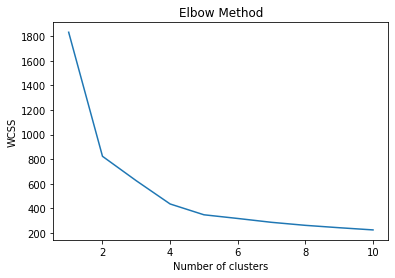

In [ ]:
# The K-means algorithm aims to choose centroids that minimize the inertia
#Using data normalized by MinMaxScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler1_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

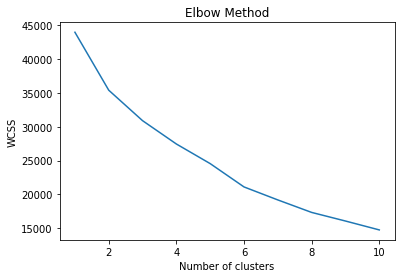

In [ ]:
# Using data normalized by MinMaxScalar
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler2_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Using data normalized by MinMaxScaler
clusters_new1 = KMeans(5, random_state=42)
clusters_new1.fit(scaler1_df)

sil_score= silhouette_score(scaler1_df, clusters_new1.labels_)
print('Silhouette Score for data normalized by MinMaxScaler: ',sil_score)

# Using data normalized by StandardScaler
clusters_new2 = KMeans(5, random_state=42)
clusters_new2.fit(scaler2_df)

sil_score= silhouette_score(scaler2_df, clusters_new2.labels_)
print('Silhouette Score for data normalized by StandardScaler: ',sil_score)

Silhouette Score for data normalized by MinMaxScaler:  0.4430672072796034
Silhouette Score for data normalized by StandardScaler:  0.32490482900380546


In [ ]:
data['clusterid_Kmeans'] = clusters_new1.labels_

In [ ]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2
ID,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0


In [ ]:
y=pd.DataFrame(clusters_new1.fit_predict(scaler1_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

4    1032
1    868 
0    808 
2    673 
3    618 
Name: clusterid_Kmeans, dtype: int64

In [ ]:
data.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2,clusterid_DBSCAN
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,0.164604,0.164604,0.977723
1,1,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,1.019585,1.019585,0.026498
2,2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,0.893016,0.893016,1.008915
3,3,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,0.377023,0.377023,-0.017799
4,4,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0,1.022287,1.022287,0.023256


# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Normalizing data using by MinMaxScaler
scaler1_df = scaler1.fit_transform(data)
print(scaler1_df)

[[0.01650773 0.         0.         ... 0.         0.25       0.25      ]
 [0.01128788 0.         0.         ... 0.         0.25       0.25      ]
 [0.02425685 0.         0.         ... 0.         0.25       0.25      ]
 ...
 [0.0431695  0.         0.5        ... 1.         0.         0.        ]
 [0.03220189 0.         0.         ... 0.         0.25       0.25      ]
 [0.00176908 0.         0.         ... 0.         0.25       0.25      ]]


In [ ]:
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(scaler1_df)

DBSCAN(eps=1, min_samples=12)

In [ ]:
# Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
y['clusterid_DBSCAN'].value_counts()

0    2518
1    1481
Name: clusterid_DBSCAN, dtype: int64

In [ ]:
# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan.labels_)
sil_score

0.5110869981982347

In [ ]:
# for epsilon = 0.8
dbscan1 = DBSCAN(eps=0.8, min_samples=12)
dbscan1.fit(scaler1_df)

y=pd.DataFrame(dbscan1.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan1.labels_)
print('silhouette score: ',sil_score)

 0    2511
 1    1472
-1    16  
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.5128932441955909


In [ ]:
# for epsilon = 0.55
dbscan4 = DBSCAN(eps=0.55, min_samples=12)
dbscan4.fit(scaler1_df)

y=pd.DataFrame(dbscan4.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan4.labels_)
print('silhouette score: ',sil_score)

 0    2479
 1    1451
-1    32  
 2    25  
 3    12  
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.4727809746620215


In [ ]:
data['clusterid_DBSCAN'] = dbscan4.labels_
data['clusterid_DBSCAN'] = dbscan4.labels_

In [ ]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_DBSCAN
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [ ]:
data.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,174768.406250,142.812500,3.000000,1.312500,2.53125,73315.187500,30.250000,3100.250000,7.968750,4440.843750,0.5625,3.187500,3.187500
1,0,59394.738604,88.577249,1.703106,1.000000,1.00000,9936.633320,9.004437,218.575232,0.632110,3820.989512,0.0000,0.827350,0.827350
2,1,96013.240524,242.702274,2.674018,1.000000,1.00000,28354.393522,15.525155,817.018608,2.501723,4626.245348,1.0000,0.443143,0.443143
3,2,43494.400000,0.000000,1.000000,2.360000,1.00000,11483.320000,13.800000,150.000000,0.600000,3544.400000,0.0000,3.000000,3.000000
4,3,91415.916667,0.000000,1.083333,2.166667,1.00000,12827.666667,19.500000,788.583333,2.166667,4540.583333,1.0000,3.000000,3.000000
